In [8]:
# PART 3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


In [9]:
df = pd.read_csv("metadata_cleaned.csv")


In [10]:
papers_per_year = df['year'].value_counts().sort_index()
print(papers_per_year)


year
1856.0         3
1857.0         1
1860.0         2
1864.0         1
1876.0         1
           ...  
2020.0    164537
2021.0    219335
2022.0     85265
2023.0         1
2024.0         1
Name: count, Length: 75, dtype: int64


In [11]:
top_journals = df['journal'].value_counts().head(10)
print(top_journals)


journal
PLoS One                           9953
bioRxiv                            8961
Int J Environ Res Public Health    8201
BMJ                                6928
Sci Rep                            5935
Cureus                             4212
Reactions Weekly                   3891
Front Psychol                      3541
BMJ Open                           3515
Front Immunol                      3442
Name: count, dtype: int64


In [12]:
# Combine all titles
all_titles = " ".join(df['title'].dropna().astype(str))

# Split words and remove common words
words = all_titles.lower().split()
common_words = ['the','and','of','in','for','on','to','with','a','an','by','using']
words = [word for word in words if word not in common_words]

# Count frequency
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
print(most_common_words)


[('covid-19', 368149), ('during', 115224), ('pandemic', 97487), ('patients', 83453), ('sars-cov-2', 78960), ('from', 73683), ('study', 68075), ('health', 59306), ('coronavirus', 52113), ('disease', 47513), ('covid-19:', 43607), ('impact', 41182), ('care', 38852), ('infection', 37691), ('review', 37599), ('analysis', 36265), ('clinical', 35858), ('case', 33741), ('as', 32425), ('among', 32296)]


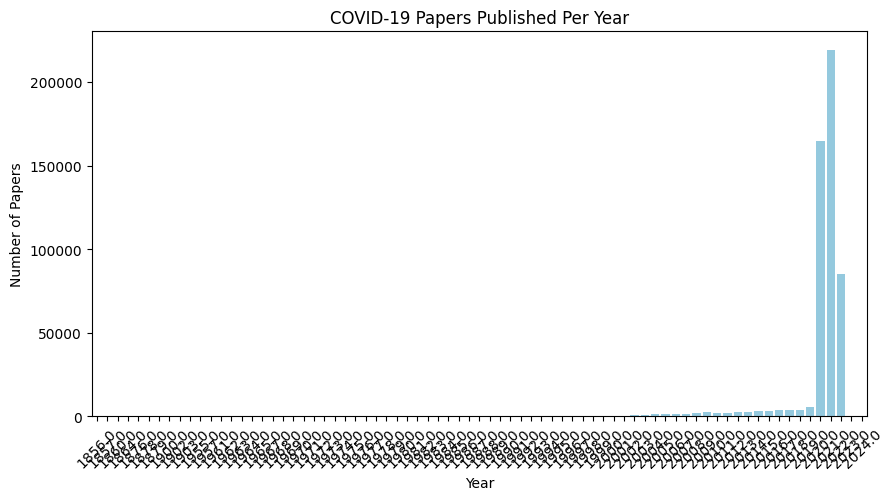

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=papers_per_year.index, y=papers_per_year.values, color='skyblue')
plt.title("COVID-19 Papers Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_49188\2611664772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")


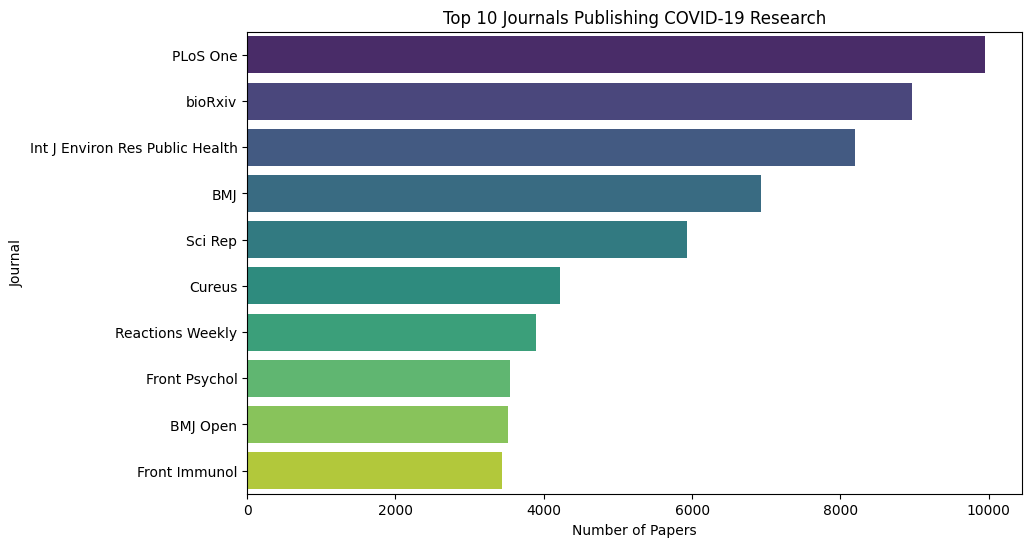

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


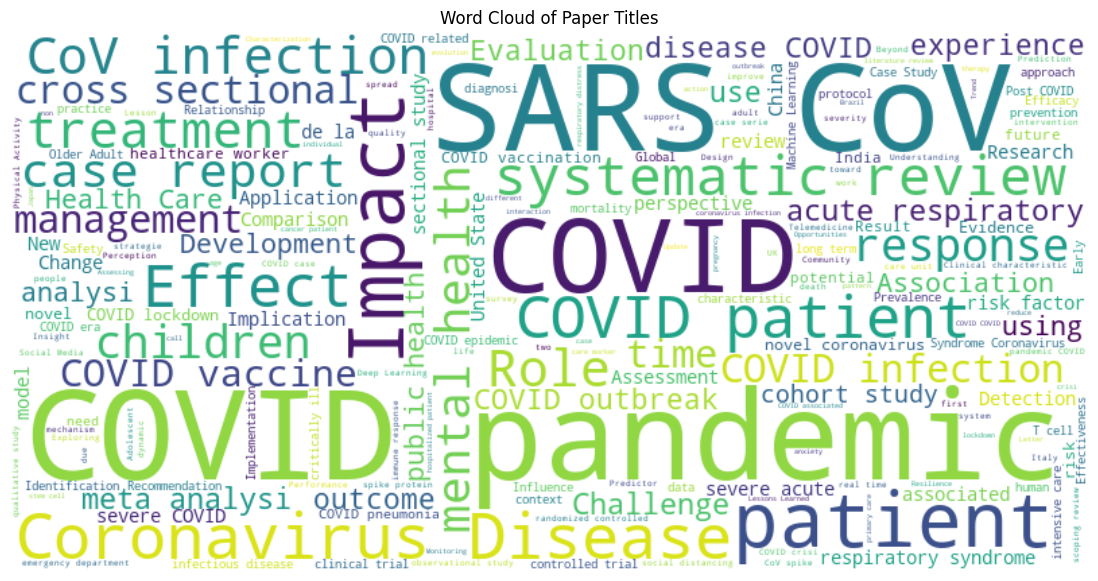

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()


In [16]:
if 'source_x' in df.columns:
    source_counts = df['source_x'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=source_counts.index, y=source_counts.values, palette="magma")
    plt.title("Top Sources of COVID-19 Papers")
    plt.xlabel("Source")
    plt.ylabel("Number of Papers")
    plt.xticks(rotation=45)
    plt.show()


In [8]:
df[['title','abstract','publish_time','authors','journal']].head()


,title,abstract,publish_time,authors,journal
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res


In [1]:
#PART 2
# ===== Step 1: Import Libraries =====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Step 2: Load Dataset =====
df = pd.read_csv("metadata.csv", low_memory=False)

# ===== Step 3: Basic Exploration =====
print("Shape:", df.shape)
print(df.columns)
print(df[['title','abstract','publish_time','authors','journal']].isna().sum())
print(df.describe())
df[['title','abstract','publish_time','authors','journal']].head()

# ===== Step 4: Keep Important Columns =====
df = df[['title','abstract','publish_time','authors','journal']]

# ===== Step 5: Handle Missing Values =====
df = df.dropna(subset=['title','publish_time'])
df['abstract'] = df['abstract'].fillna("No abstract available")

# ===== Step 6: Convert Dates to Datetime =====
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# ===== Step 7: Extract Year =====
df['year'] = df['publish_time'].dt.year

# ===== Step 8: Create Additional Columns =====
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(str(x).split()))

# ===== Step 9: Save Cleaned Dataset =====
df_cleaned = df.copy()
df_cleaned.to_csv("metadata_cleaned.csv", index=False)

# ===== Step 10: Preview Cleaned Dataset =====
df_cleaned.head()
df_cleaned.info()


Shape: (1056660, 19)
Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')
title              503
abstract        235544
publish_time      1814
authors          23869
journal          87322
dtype: int64
       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08
<class 'pandas.core.frame.DataFrame'>
Index: 1054343 entries, 0 to 1056659
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   title                1054343 non-null  object        
 1   abstract             1054343 non-nu

In [2]:
df.describe()


,publish_time,year,abstract_word_count
count,518429,518429.000000,1.054343e+06
mean,2020-06-11 10:20:16.584720896,2019.961412,1.652898e+02
min,1856-04-01 00:00:00,1856.000000,1.000000e+00
25%,2020-08-06 00:00:00,2020.000000,5.500000e+01
50%,2021-03-17 00:00:00,2021.000000,1.790000e+02
75%,2021-10-19 00:00:00,2021.000000,2.470000e+02
max,2024-04-20 00:00:00,2024.000000,1.800000e+04
std,NaN,3.538723,1.233673e+02


In [3]:
df[['title','abstract','publish_time','authors','journal']].isna().sum()


title                0
abstract             0
publish_time    535914
authors          23784
journal          85650
dtype: int64

In [4]:
df.columns  # List all column names
df.dtypes   # Show data types of each column


title                          object
abstract                       object
publish_time           datetime64[ns]
authors                        object
journal                        object
year                          float64
abstract_word_count             int64
dtype: object

In [5]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 1054343
Number of columns: 7


In [6]:
df = pd.read_csv("metadata.csv", low_memory=False)
df.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
